In [1]:
%matplotlib inline
%autosave 0


import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import math

Autosave disabled


In [2]:
from scipy.optimize import fmin_l_bfgs_b

# Import data

In [3]:
ex2data = np.genfromtxt("/Users/nunopires/Documents/Coursera/machine-learning-ex2/ex2/ex2data1.txt", delimiter=',')

print ex2data[:5]
print 'shape = ', ex2data.shape

[[ 34.62365962  78.02469282   0.        ]
 [ 30.28671077  43.89499752   0.        ]
 [ 35.84740877  72.90219803   0.        ]
 [ 60.18259939  86.3085521    1.        ]
 [ 79.03273605  75.34437644   1.        ]]
shape =  (100, 3)


In [4]:
# create X and Y matrices, one observation per row
X = ex2data[:,:2]
Y = ex2data[:,2]
Y = Y.reshape(Y.size, 1)

# add column with ones (intercept) to X
X = X = np.hstack((np.ones((Y.size, 1)), X))

print X.shape, Y.shape

(100, 3) (100, 1)


# Plot data

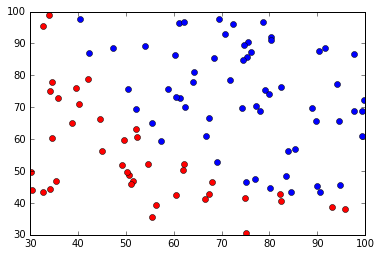

In [5]:
on = Y[:,0] == 1
off = Y[:,0] == 0

plt.plot(X[on, 1], X[on, 2], 'o', color = 'blue'); # Y positives
plt.plot(X[off, 1], X[off, 2], 'o', color = 'red'); # Y negatives

## Calculate sigmoid function

In [6]:
def sigmoid(x):
    '''Compute the sigmoid function '''
    return 1 / (1 + np.exp(-x)) # use numpy.exp, because math.exp only works with scalars

# test
a = np.array([[-10, -5, 0], [1, 10, 100]])
print a, '\n', sigmoid(a)

[[-10  -5   0]
 [  1  10 100]] 
[[  4.53978687e-05   6.69285092e-03   5.00000000e-01]
 [  7.31058579e-01   9.99954602e-01   1.00000000e+00]]


## Calculate cost J

In [7]:
def computeJ(theta, X, Y):
    '''Compute the cost function.
    input theta should have ndim = 1 to be able to be used in minimise function'''
    
    theta = theta.reshape(3,1)

    m = Y.size # number observations
    h = sigmoid(np.dot(X, theta))
    J = np.sum((-Y * np.log(h)) - ((1. - Y) * np.log(1. - h))) / m
    
    return J

In [8]:
# initialize theta
theta = np.zeros((3))
computeJ(theta, X, Y)

0.69314718055994529

## Calculate gradient

This is not required, since the Nelder-Mead method will be used as minimization algorithm

In [9]:
def computeGrad(theta, X, Y):
    '''computes gradient of logistic cost function'''
    
    theta = theta.reshape(3,1)
    
    m = Y.size
    grad = np.dot(X.T, (sigmoid(np.dot(X, theta)) - Y)) / m
    return grad.flatten()

computeGrad(theta, X, Y) # test

array([ -0.1       , -12.00921659, -11.26284221])

## Optimize J
Octave's fminunc function was used in Coursera. The alternative in Python is [Scipy's optimize.minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize) family.

BFGS would be the closest to fminunc (? not clear), but the implementation is not working either with a custom gradient (does not work at all, problem seems to be matrix multiplications and/or very extreme logit values) or without (thetas are way too high).

Best option appears to be the simplest, the Nelder-Mead method(Simplex algorithm), which is anyway a derivative-free method).

* Expected theta values are [-25.161, 0.206, 0.201]


In [10]:
for alg in ['Nelder-Mead', 'BFGS', 'Powell', 'CG', 'L-BFGS-B', 'TNC', 'SLSQP']:
    temp = minimize(computeJ, x0 = theta, args = (X, Y), method=alg)
    print '---', alg, 'estim = ', temp.x, 'J = ', temp.fun

--- Nelder-Mead estim =  [-25.16130062   0.20623142   0.20147143] J =  0.20349770159
--- BFGS estim =  [   6.28160425  754.37095625  707.48666377] J =  nan
--- Powell estim =  [ 210.02592519  212.21017485  212.21017485] J =  nan
--- CG estim =  [   6.28160425  754.37095625  707.48666377] J =  nan
--- L-BFGS-B estim =  [ 0.  0.  0.] J =  nan
--- TNC estim =  [-25.17512062   0.20636045   0.20156312] J =  0.203497742492
--- SLSQP estim =  [ nan  nan  nan] J =  nan


/Users/nunopires/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in log
/Users/nunopires/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in multiply


In [11]:
estim = minimize(computeJ, x0 = theta, args = (X, Y), method='Nelder-Mead').x
print estim

[-25.16130062   0.20623142   0.20147143]


### Make predictions
This gives the probability of a positive result

In [12]:
grades = np.array([1, 45, 85])
sigmoid(np.dot(grades, estim))

0.77629159041124107

# Plot decision boundary
simple, linear decision boundary

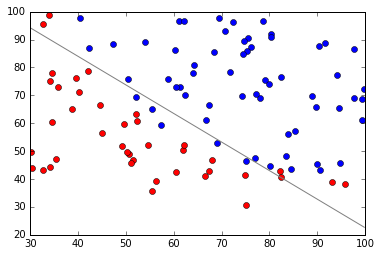

In [13]:
on = Y[:,0] == 1
off = Y[:,0] == 0

plt.plot(X[on, 1], X[on, 2], 'o', color = 'blue'); # Y positives
plt.plot(X[off, 1], X[off, 2], 'o', color = 'red'); # Y negatives

X_pred = [min(X[:,1]), max(X[:,1])]
# boundary occurs when sigmoid = 0.5, <=> h = 0
# <=> Th0 + Th1.X + Th2.Y = 0
# This means that Y = (-Th0 - Th1.X) / Th2

Y_pred = [(-estim.item(0) - estim.item(1)*x) / estim.item(2) for x in X_pred]
plt.plot(X_pred, Y_pred, color = 'grey')

# Calculate accuracy

In [14]:
def predict(X, estim):
    p = sigmoid(np.dot(X, estim)) > 0.5
    return p * 1

In [15]:
p = predict(X, estim)

In [16]:
print 'Accuracy = %2.2f' % np.mean((p == Y.T)) # or (np.sum((p == Y.T)) / float(Y.size))

Accuracy = 0.89
